In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#start the data analysis and clean the data

In [107]:
df = pd.read_csv("/content/911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [108]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [110]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [111]:
df.isna().sum()

,0
lat,0
lng,0
desc,0
zip,12855
title,0
timeStamp,0
twp,43
addr,519
e,0


In [112]:
len(df.columns)

9

In [113]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [114]:
df.duplicated().sum()

0

In [115]:
#Drop all rows with any missing values from the DataFrame and modify the DataFrame in place.
df.dropna(inplace = True)

In [116]:
df.isna().sum()

,0
lat,0
lng,0
desc,0
zip,0
title,0
timeStamp,0
twp,0
addr,0
e,0


In [117]:
# Convert timeStamp to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Create new columns for better analysis
df['Year'] = df['timeStamp'].dt.year
df['Month'] = df['timeStamp'].dt.month
df['Day'] = df['timeStamp'].dt.day
df['Hour'] = df['timeStamp'].dt.hour
df['Weekday'] = df['timeStamp'].dt.day_name()

In [118]:
# Split title into "Category" and "Subcategory"
df[['Category', 'Subcategory']] = df['title'].str.split(': ', expand=True)

In [119]:
# Top 10 most common townships
top_townships = df['twp'].value_counts().head(10)

#Visualizations:

####Plot: Distribution of emergency categories

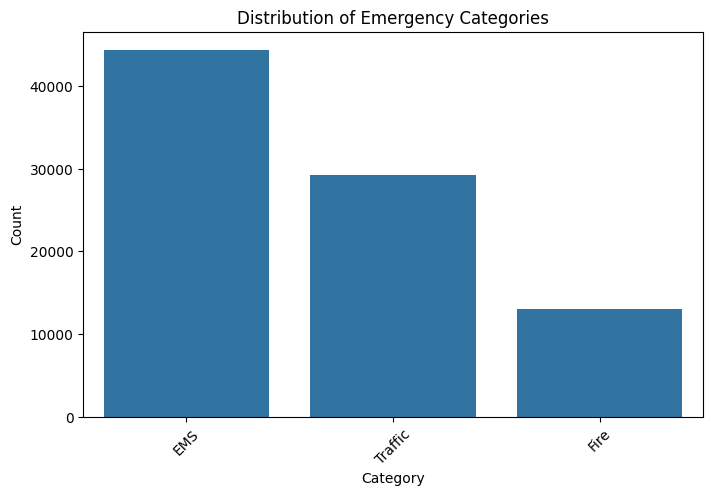

In [120]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Distribution of Emergency Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Plot: Emergency calls by hour

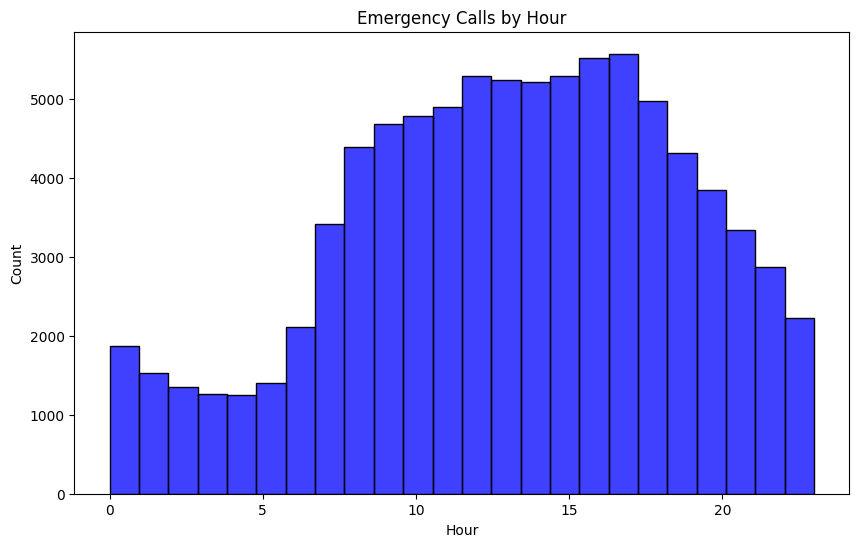

In [121]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Hour', bins=24, kde=False, color='blue')
plt.title('Emergency Calls by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

####Heatmap: Calls by Weekday and Hour

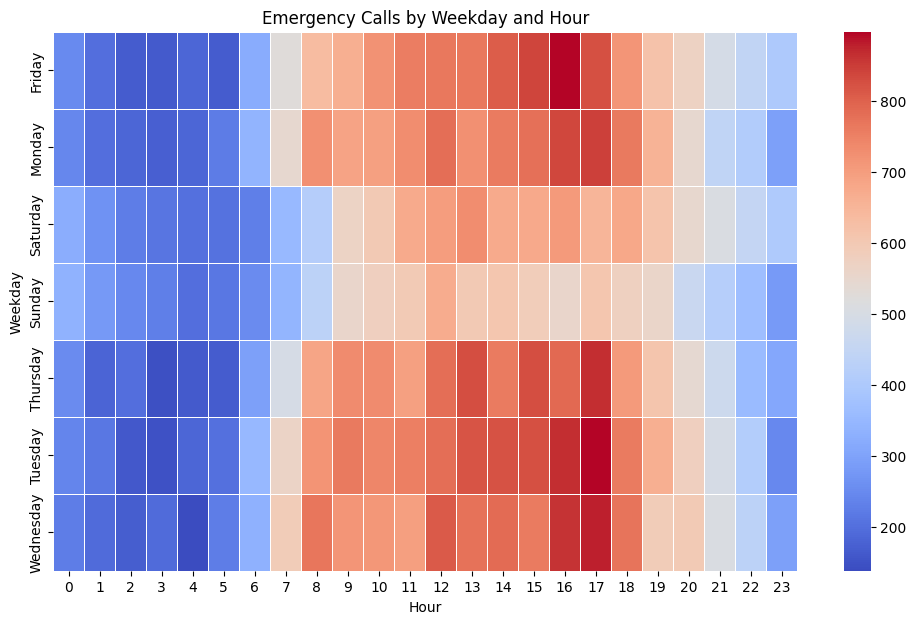

In [122]:
heatmap_data = df.pivot_table(index='Weekday', columns='Hour', values='e', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Emergency Calls by Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.show()


####Plot: Emergency Calls by Month and Category (Title)

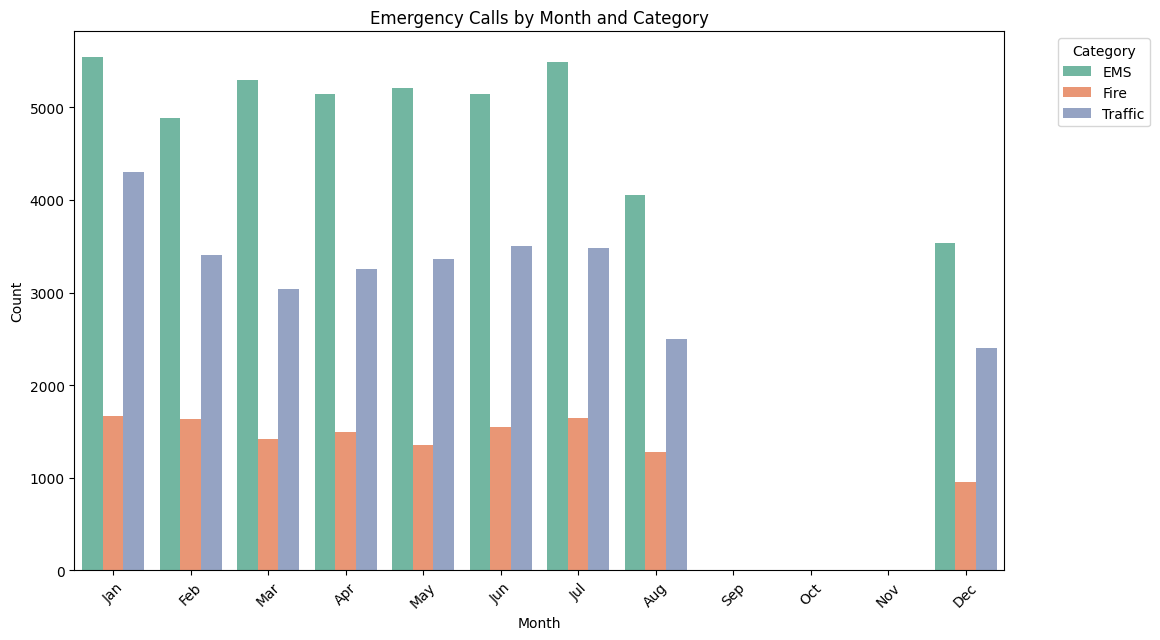

In [123]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Month', hue='Category', order=range(1, 13), palette='Set2')
plt.title('Emergency Calls by Month and Category')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

####Plot: Top 10 townships with most calls

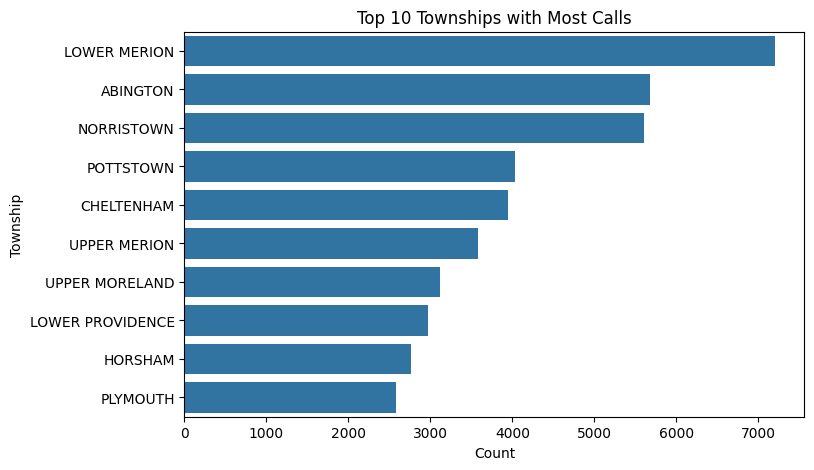

In [124]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_townships.values, y=top_townships.index)
plt.title('Top 10 Townships with Most Calls')
plt.xlabel('Count')
plt.ylabel('Township')
plt.show()

# Summary Statistics

In [125]:
print("\nSummary of Emergency Categories:")
print(df['Category'].value_counts())


Summary of Emergency Categories:
Category
EMS        44318
Traffic    29254
Fire       13004
Name: count, dtype: int64


In [126]:
print("\nTop 10 Townships:")
print(top_townships)


Top 10 Townships:
twp
LOWER MERION        7202
ABINGTON            5675
NORRISTOWN          5610
POTTSTOWN           4029
CHELTENHAM          3942
UPPER MERION        3582
UPPER MORELAND      3123
LOWER PROVIDENCE    2970
HORSHAM             2764
PLYMOUTH            2578
Name: count, dtype: int64


In [127]:
print("\nData Overview:")
print(df.describe(include='all'))


Data Overview:
                 lat           lng  \
count   86576.000000  86576.000000   
unique           NaN           NaN   
top              NaN           NaN   
freq             NaN           NaN   
mean       40.160513    -75.316311   
min        30.333596    -95.595595   
25%        40.102501    -75.398209   
50%        40.145272    -75.301972   
75%        40.232093    -75.206303   
max        40.479853    -74.995041   
std         0.096151      0.179107   

                                                     desc           zip  \
count                                               86576  86576.000000   
unique                                              86542           NaN   
top     GREEN ST & E BASIN ST;  NORRISTOWN; Station 30...           NaN   
freq                                                    4           NaN   
mean                                                  NaN  19237.659952   
min                                                   NaN  18036.000000   
25

# Machine learning

##### Select features (X) and target (y)


In [129]:
X = df[['Year', 'Month', 'Day', 'Hour', 'Weekday', 'twp', 'addr', 'Subcategory']]  # Example features
y = df['Category']  # Target variable

#### Preprocess the data
#### Categorical columns to apply one-hot encoding

In [130]:
categorical_cols = ['Weekday', 'twp', 'addr', 'Subcategory']
numerical_cols = ['Year', 'Month', 'Day', 'Hour']

#### Column transformer to handle preprocessing
#### Create a pipeline with preprocessing and a classifier


In [131]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Add handle_unknown='ignore' for unseen categories
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # You can change to any classifier
])

#### Split the data into train and test sets


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train the model

In [133]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Month', 'Day',
                                                   'Hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Weekday', 'twp', 'addr',
                                                   'Subcategory'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

#### Make predictions


In [134]:
y_pred = pipeline.predict(X_test)

#### Evaluate the model

In [135]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9699

Classification Report:
              precision    recall  f1-score   support

         EMS       0.97      0.97      0.97      8926
        Fire       0.91      0.89      0.90      2613
     Traffic       1.00      1.00      1.00      5777

    accuracy                           0.97     17316
   macro avg       0.96      0.95      0.96     17316
weighted avg       0.97      0.97      0.97     17316



#### Display confusion matrix

In [136]:
conf_matrix = confusion_matrix(y_test, y_pred)

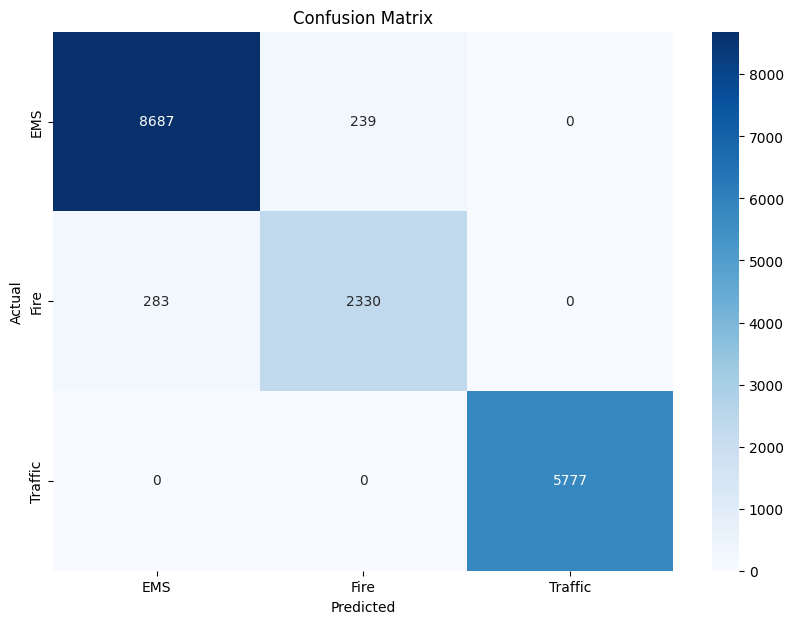

In [137]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Let's create a DataFrame with all relevant data
#### Combining original data with the features for ML model

In [138]:
df_ml = pd.concat([X, y], axis=1)

#### Check the DataFrame

In [139]:
print("Data for Machine Learning:")
print(df_ml.head())

Data for Machine Learning:
   Year  Month  Day  Hour   Weekday                twp  \
0  2015     12   10    17  Thursday        NEW HANOVER   
1  2015     12   10    17  Thursday  HATFIELD TOWNSHIP   
2  2015     12   10    17  Thursday         NORRISTOWN   
3  2015     12   10    17  Thursday         NORRISTOWN   
5  2015     12   10    17  Thursday           LANSDALE   

                         addr         Subcategory Category  
0      REINDEER CT & DEAD END   BACK PAINS/INJURY      EMS  
1  BRIAR PATH & WHITEMARSH LN  DIABETIC EMERGENCY      EMS  
2                    HAWS AVE       GAS-ODOR/LEAK     Fire  
3          AIRY ST & SWEDE ST   CARDIAC EMERGENCY      EMS  
5       CANNON AVE & W 9TH ST         HEAD INJURY      EMS  


#### Summary Statistics

In [140]:
print("\nSummary Statistics of Data:")
print(df_ml.describe(include='all'))


Summary Statistics of Data:
                Year         Month           Day          Hour  Weekday  \
count   86576.000000  86576.000000  86576.000000  86576.000000    86576   
unique           NaN           NaN           NaN           NaN        7   
top              NaN           NaN           NaN           NaN  Tuesday   
freq             NaN           NaN           NaN           NaN    13197   
mean     2015.920324      4.976934     15.941150     13.104255      NaN   
std         0.270792      3.008374      8.576174      5.682098      NaN   
min      2015.000000      1.000000      1.000000      0.000000      NaN   
25%      2016.000000      3.000000      9.000000      9.000000      NaN   
50%      2016.000000      5.000000     16.000000     13.000000      NaN   
75%      2016.000000      7.000000     23.000000     17.000000      NaN   
max      2016.000000     12.000000     31.000000     23.000000      NaN   

                 twp                               addr         Subcat

# Display the DataFrame

In [141]:
df_ml.head()

,Year,Month,Day,Hour,Weekday,twp,addr,Subcategory,Category
0,2015,12,10,17,Thursday,NEW HANOVER,REINDEER CT & DEAD END,BACK PAINS/INJURY,EMS
1,2015,12,10,17,Thursday,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,DIABETIC EMERGENCY,EMS
2,2015,12,10,17,Thursday,NORRISTOWN,HAWS AVE,GAS-ODOR/LEAK,Fire
3,2015,12,10,17,Thursday,NORRISTOWN,AIRY ST & SWEDE ST,CARDIAC EMERGENCY,EMS
5,2015,12,10,17,Thursday,LANSDALE,CANNON AVE & W 9TH ST,HEAD INJURY,EMS
